BANK CUSTOMER CHURN!

"Exploratory Data ANalysis & Prediction!"

1.Introduction

Aim to accomplish the folowing:

1.Identify and visaulize which factos contribute to customer Churn.
2.Build a prediction model that will peform the following:
 - Classify if a customer is going to churn or not
 - Preferably and based on model performance, choose a model that will attach a probality to churn to make it easier fro customer service to target low hanging fruits in their effort to prevent churn

2. Data Set Review & Preparation
To explore the structure of the data:
- To understand the input space and data set
- To prepare the sets for exploratary and prediction tasks

In [ ]:
#Import Required libraries
#For data Wrangling
import numpy as np
import pandas as pd
#For visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [ ]:
#Read the data frame
data = pd.read_csv(r'/content/Churn_Modelling.csv')
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.shape

(10000, 14)

The Data has 1000 rows with 14 attributes. Review thsi further to identify what attribute will be necessary and what data manupluation needs to be carried out before Exploratory analysis and prediction modelling

In [ ]:
# Check Duplicate customer
data.duplicated().sum()

0

In [ ]:
# Check columns list and missing data
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
# Get unique count for each varibale
data.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


From the above, we will not require the first 2 attributes as they specify to customer.it is borderline with the surname as this would result to profiling so we exclude this as well.

In [ ]:
#Drop the columns as explained above
Columns_to_drop = ['RowNumber','CustomerId','Surname']
data= data.drop(['RowNumber','CustomerId','Surname'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Check variable info with data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


So we have 2 Categorical varibales and continuous variable

EDA(Exploratory Data Analysis)

To get an understanding as to how the given attributes relate too the exist status

In [ ]:
plt.figure(figsize=(15,10))
data['Gender'].value_counts().plot(kind='pie')
plt.title('Gender Distribution')
plt.show()

In [ ]:
fig = px.histogram(x=df['Exited'],color=df['Gender'],barmode='group')
fig.update_layout(width=700,height=500,bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(x=df['Exited'],color=df['Geography'],barmode='group')
fig.update_layout(width=700,height=500,bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(x=df['Exited'],color=df['HasCrCard'],barmode='group')
fig.update_layout(width=700,height=500,bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(x=df['Exited'],color=df['IsActiveMember'],barmode='group')
fig.update_layout(width=700,height=500,bargap=0.1)
fig.show()

Label Encoding for each Object datatype

In [ ]:
from sklearn import preprocessing
for col in data.select_dtypes(include=['object']).columns:

  print(f"{col}: {data[col].unique()}")

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [ ]:
for col in data.select_dtypes(include=['object']).columns:

  label_encoder =preprocessing.LabelEncoder()
  label_encoder.fit(data[col].unique())

  data[col] = label_encoder.transform(data[col])
  print(f"{col}: {data[col].unique()}")

Geography: [0 2 1]
Gender: [0 1]


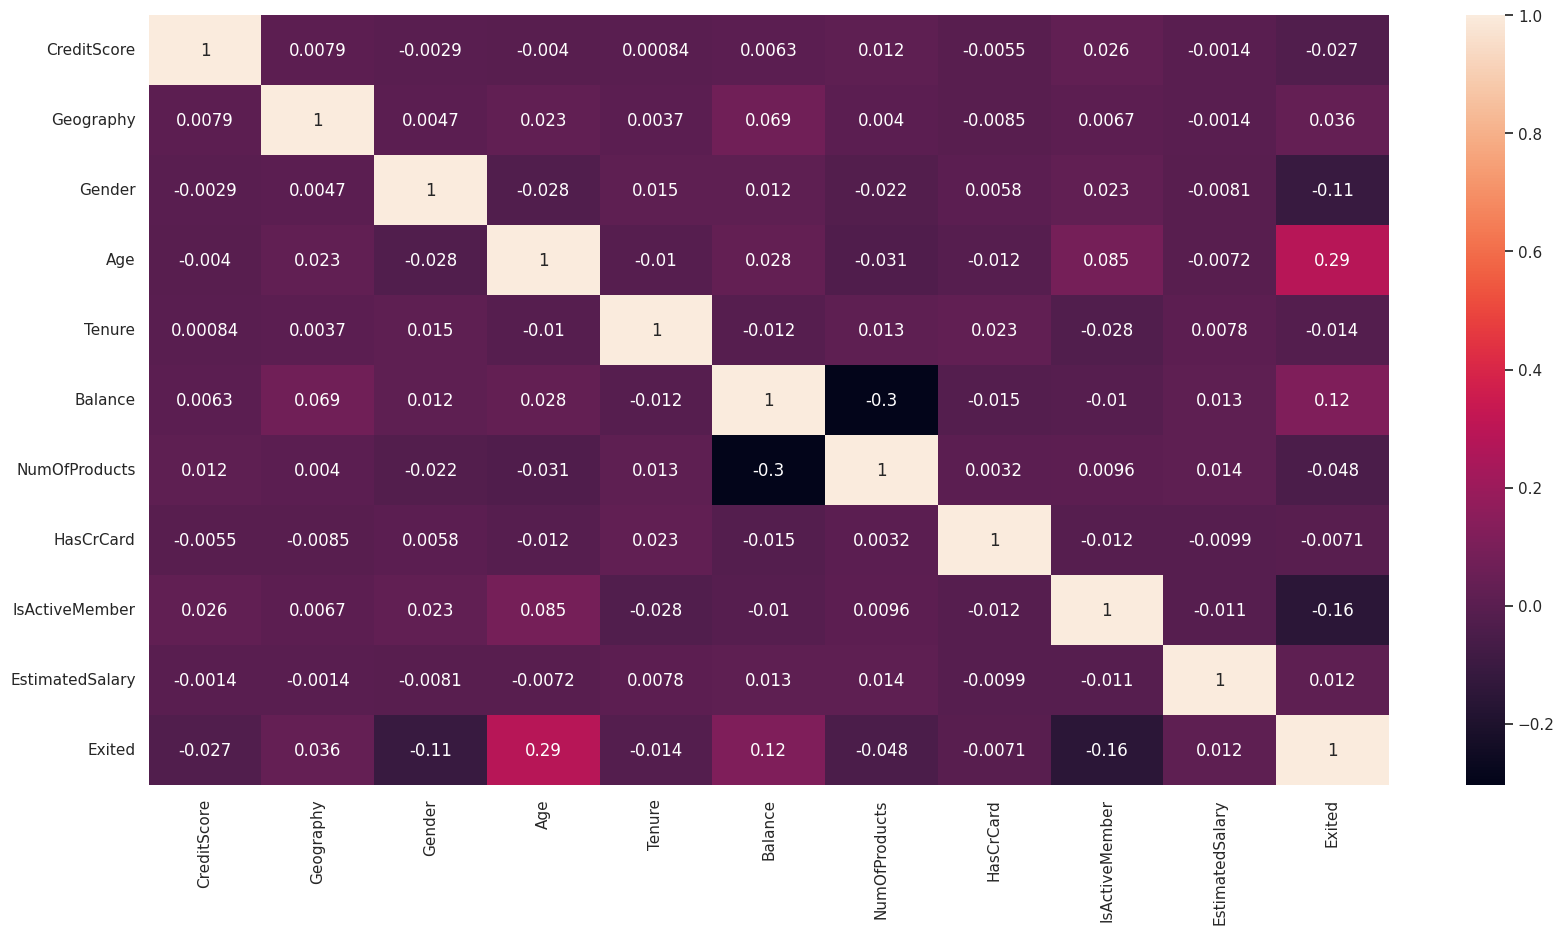

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

Feature Engineering

To add features that are likely to have an impact on the probability of churning.
First split the train and test sets

In [ ]:
# Select the features(x) and target variable(y)
x= data.drop('Exited', axis=1)
y= data['Exited']

In [ ]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [ ]:
x.shape

(10000, 10)

In [ ]:
y.shape

(10000,)

In [ ]:
y.value_counts()

,count
Exited,
0,7963
1,2037


In [ ]:
# Imbalance treatment however we require training and test dataset

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)
print(y.value_counts())
print(y_smote.value_counts())

Exited
0    7963
1    2037
Name: count, dtype: int64
Exited
1    7963
0    7963
Name: count, dtype: int64


In [ ]:
# Spliting the data to Train and Test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
#x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

In [ ]:
y.value_counts()

,count
Exited,
0,7963
1,2037


 Data leakage problems -

- if we have train and test data separatle, we have to handle missing data, feature scaling, outlier treatment separetly

In [ ]:
# Standard Scaling for the continous varibales

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

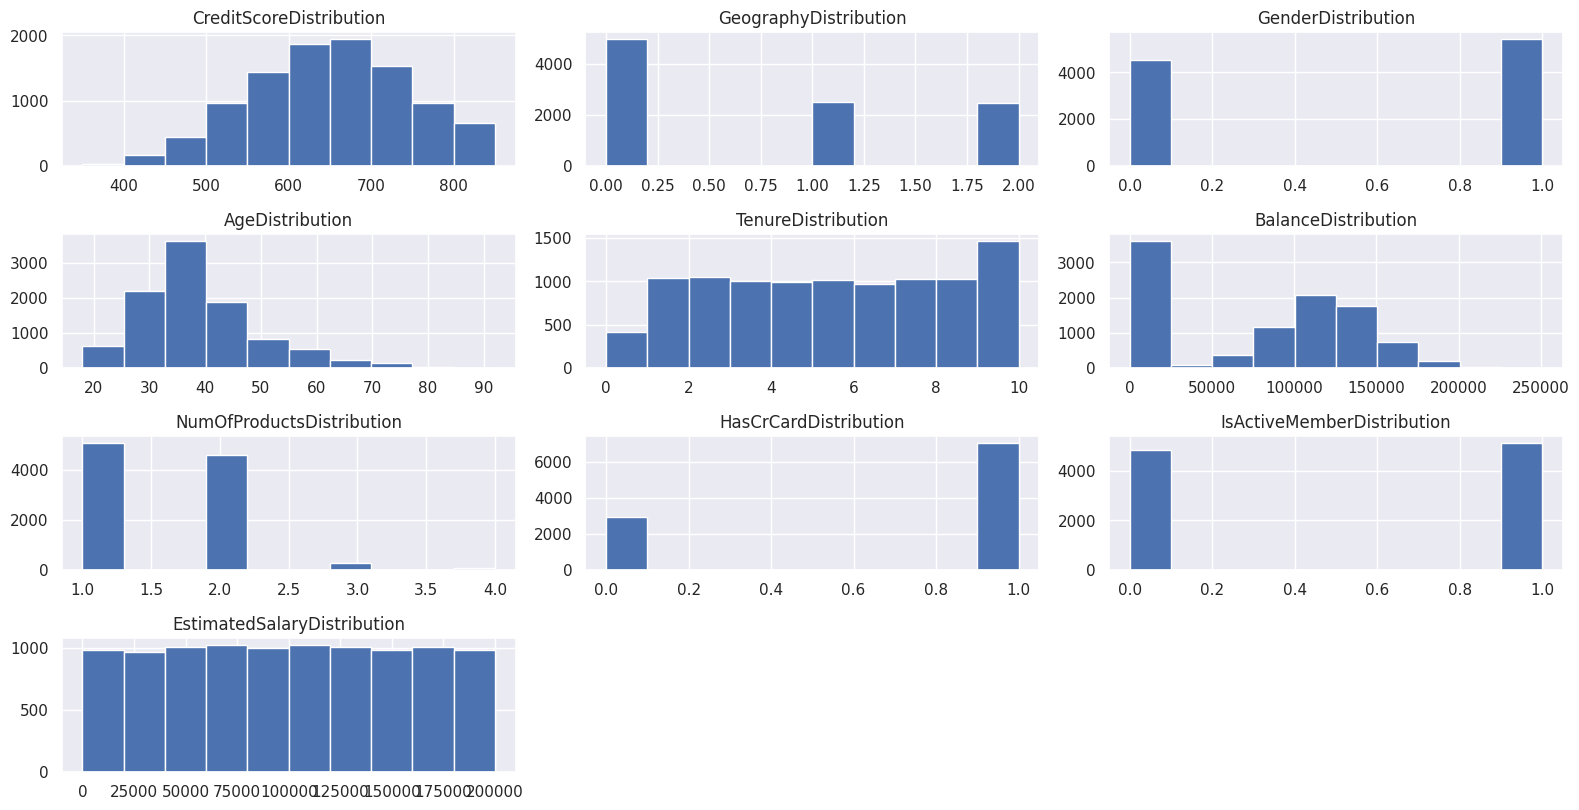

In [ ]:
def draw_histogram(data,variables, n_rows, n_cols):
  fig = plt.figure(figsize=(16,10))
  for i, var_name in enumerate(variables):
    ax = fig.add_subplot(n_rows, n_cols, i+1)
    data[var_name].hist(bins=10, ax=ax)
    ax.set_title(var_name + 'Distribution')
  fig.tight_layout()
  plt.show()

draw_histogram(data, x, 5, 3)

<Axes: xlabel='Exited'>

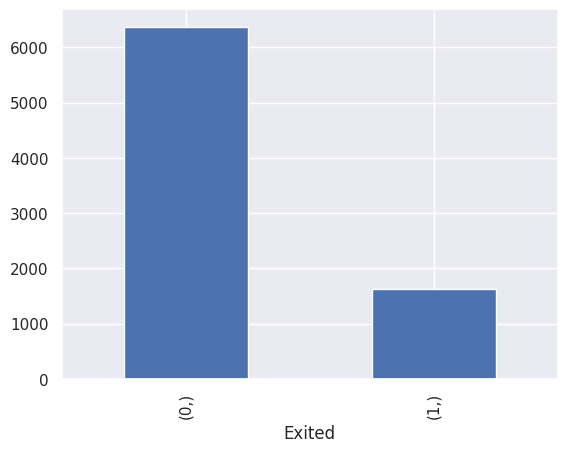

In [ ]:
pd.DataFrame(y_train).value_counts().plot(kind='bar')

<Axes: xlabel='Exited'>

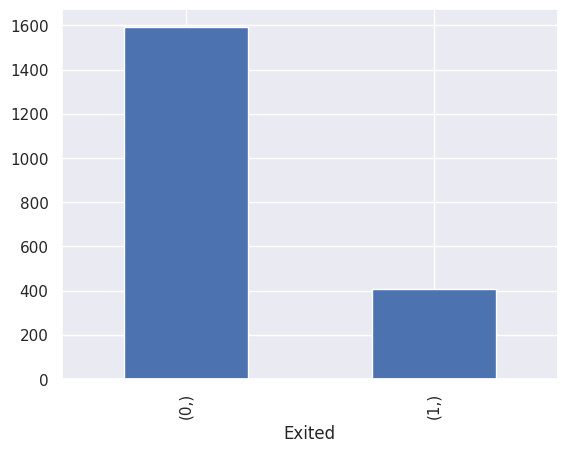

In [ ]:
pd.DataFrame(y_test).value_counts().plot(kind='bar')

# Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': [250]
}

# perform a grid search with cross-validation to find the best hyperparameter
log_grid_search = GridSearchCV(log,param_grid,cv=5)
log_grid_search.fit(x_train,y_train)

print(log_grid_search.best_params_)
print(log_grid_search.best_score_)

{'C': 0.1, 'max_iter': 250, 'penalty': 'l2'}
0.8078749999999999


In [ ]:
log = LogisticRegression(C=0.1,penalty='l2',max_iter=250)
log.fit(x_train, y_train)

y_pred_train_log = log.predict(x_train)
y_pred_test_log = log.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy_Score for train and test data')
print('Accuracy_Score for train:',accuracy_score(y_train, y_pred_train_log))
print('Accuracy_Score for test:',accuracy_score(y_test, y_pred_test_log))
print()
print('Classification report for train and test data')
print('Classification_report for train:',classification_report(y_train, y_pred_train_log))
print('Classification_report for test:',classification_report(y_test, y_pred_test_log))

Accuracy_Score for train and test data
Accuracy_Score for train: 0.807625
Accuracy_Score for test: 0.805

Classification report for train and test data
Classification_report for train:               precision    recall  f1-score   support

           0       0.82      0.97      0.89      6370
           1       0.60      0.17      0.26      1630

    accuracy                           0.81      8000
   macro avg       0.71      0.57      0.58      8000
weighted avg       0.78      0.81      0.76      8000

Classification_report for test:               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.14      0.23       407

    accuracy                           0.81      2000
   macro avg       0.70      0.56      0.56      2000
weighted avg       0.77      0.81      0.75      2000



RandomForest Classifer

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()

param_grid = {'n_estimators': [50,100],
              'max_depth': [3, 5, 6, 7, 8],
              'max_features': [2,4,6,7,8,9],
              'min_samples_split': [3, 5, 6, 7]}

# perform a grid search with cross-validation to find the best hyperparameter
grid_search = GridSearchCV(rfc,param_grid,cv=5)
grid_search.fit(x_train,y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 8, 'max_features': 8, 'min_samples_split': 7, 'n_estimators': 50}
0.8623749999999999


In [ ]:
#Fit Random Forest Classifier
rfc = RandomForestClassifier(max_depth=8, max_features=8, n_estimators=50, random_state=None, verbose=0)
rfc.fit(x_train, y_train)

y_pred_train_rfc = rfc.predict(x_train)
y_pred_test_rfc = rfc.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy_Score for train and test data')
print('Accuracy_Score for train:',accuracy_score(y_train, y_pred_train_rfc))
print('Accuracy_Score for test:',accuracy_score(y_test, y_pred_test_rfc))
print()
print('Classification report for train and test data')
print('Classification_report for train:',classification_report(y_train, y_pred_train_rfc))
print('Classification_report for test:',classification_report(y_test, y_pred_test_rfc))

Accuracy_Score for train and test data
Accuracy_Score for train: 0.882625
Accuracy_Score for test: 0.8605

Classification report for train and test data
Classification_report for train:               precision    recall  f1-score   support

           0       0.88      0.98      0.93      6370
           1       0.88      0.49      0.63      1630

    accuracy                           0.88      8000
   macro avg       0.88      0.74      0.78      8000
weighted avg       0.88      0.88      0.87      8000

Classification_report for test:               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.79      0.43      0.56       407

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



ROC curve and AUC

- ROC curve summarizes the performance by combining confusion matrices at all threshold values.

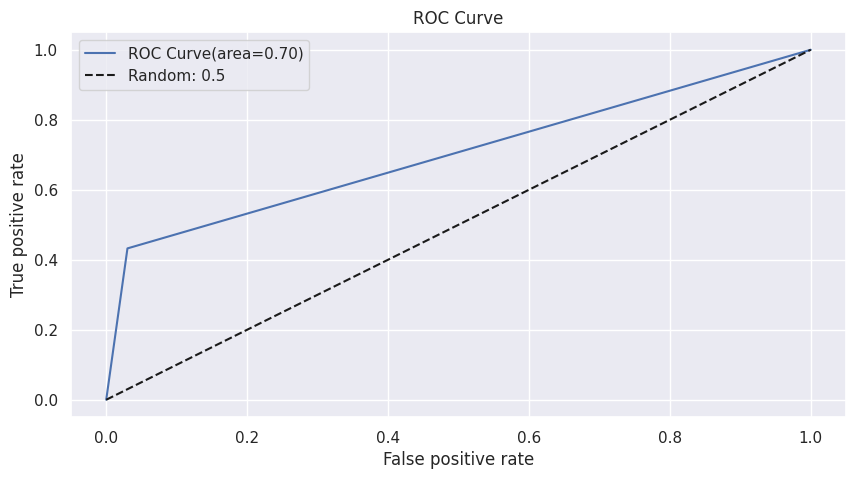

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

rfc_roc_auc = roc_auc_score(y_test, y_pred_test_rfc)
fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, y_pred_test_rfc)

plt.figure(figsize=(10,5),linewidth=1)
plt.plot(fpr_RF, tpr_RF, label = 'ROC Curve(area=%0.2f)'%rfc_roc_auc)
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

# KNN Algorithum

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors':np.arange(1,50)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x_train,y_train)

print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 17}
0.83725


In [ ]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train, y_train)

y_pred_train_knn = knn.predict(x_train)
y_pred_test_knn = knn.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('Accuracy_Score for train and test')
print(accuracy_score(y_train, y_pred_train_knn))
print(accuracy_score(y_test, y_pred_test_knn))
print()
print('Classification report for train and test')
print(classification_report(y_train, y_pred_train_knn))
print(classification_report(y_test, y_pred_test_knn))

Accuracy_Score for train and test
0.84575
0.837

Classification report for train and test
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      6370
           1       0.79      0.33      0.46      1630

    accuracy                           0.85      8000
   macro avg       0.82      0.65      0.69      8000
weighted avg       0.84      0.85      0.82      8000

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      1593
           1       0.79      0.27      0.41       407

    accuracy                           0.84      2000
   macro avg       0.81      0.63      0.66      2000
weighted avg       0.83      0.84      0.80      2000



In [ ]:
#Using Error rate will change the n_neighbors value to check accuracy

error_rate = []

for i in range(1,30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  error_rate.append(np.mean(y_pred != y_test))

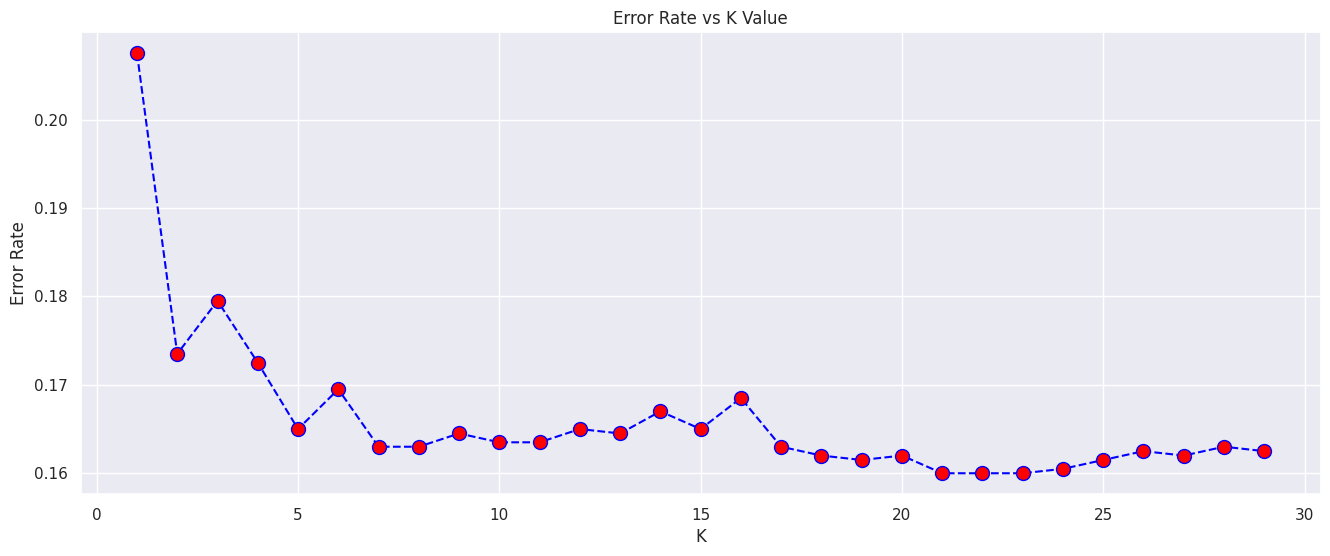

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(range(1,30), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

#Important Features

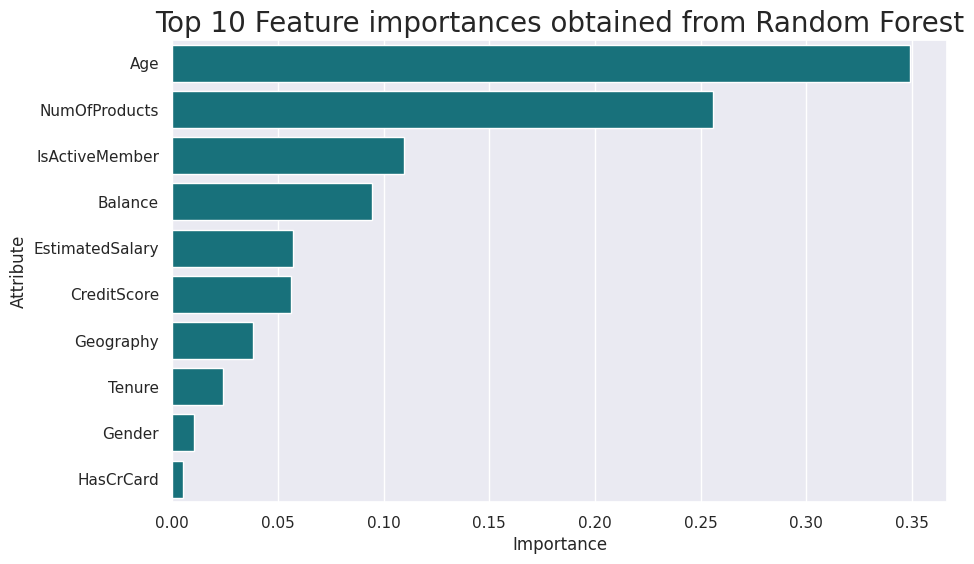

In [ ]:

imp_data = pd.DataFrame(data={'Attribute': x.columns,
                               'Importance': rfc.feature_importances_})
imp = imp_data.sort_values(by='Importance', ascending=False)

imp_10 = imp.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=imp_10, x='Importance', y='Attribute', color='#087E8B')
plt.title('Top 10 Feature importances obtained from Random Forest', size=20)
plt.xlabel('Importance')
plt.ylabel('Attribute')
plt.show()

from the review of the fitted models above , the best model that gives the decent balance of the recall and precision is the random forest where according the fit on the training set with a precision score on 1's of 0.88, out of all customers theta the model think will churn,88% do actually churn and with the recall score of 0.49 on the 1's, the model is able to highlight 49% of all those who churned.